<a href="https://colab.research.google.com/github/hgmhd7/AI-Machine-Learning/blob/main/Bagging_%26_Boosting_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Introduction

**Problem Statement:**

Many of you may remember watching Pokémon during your childhood, so we've created an exciting challenge for you! You'll analyze data and build a machine learning model to predict the rarity of a given Pokémon. The target rarity includes four unique classes: Standard, Legendary, Mythic, and Ultra Beast.

- **Standard Pokémon:** These are the most common Pokémon found in the game. They can be caught in various environments and are typically easier to obtain. Standard Pokémon are often the backbone of trainers' teams and can evolve into more powerful forms.

- **Legendary Pokémon:** These are rare and powerful Pokémon that are often tied to special in-game events or raids. They usually have higher base stats and unique abilities compared to Standard Pokémon. Legendary Pokémon are not typically available in the wild and often require specific conditions or events to be caught.

- **Mythic Pokémon:** Mythic Pokémon are even rarer than Legendary Pokémon and are often tied to specific storylines or special quests. They are usually available for a limited time and often have unique traits or abilities. Mythic Pokémon typically cannot be caught in standard gameplay and are obtained through special research tasks.

- **Ultra Beasts:** These are a special category of Pokémon introduced in later generations. Ultra Beasts have unique designs and lore, often originating from other dimensions. They tend to have high stats and unique abilities, making them formidable in battles. Ultra Beasts can be encountered in specific events or challenges and usually have special requirements for capture.






<center><img src="https://storage.googleapis.com/kaggle-datasets-images/5494631/9104107/014a281ff7b3277881bfdbb70238860b/dataset-cover.jpg?t=2024-08-04-16-12-14" width = 410 height = 300 /></center>

........................................................................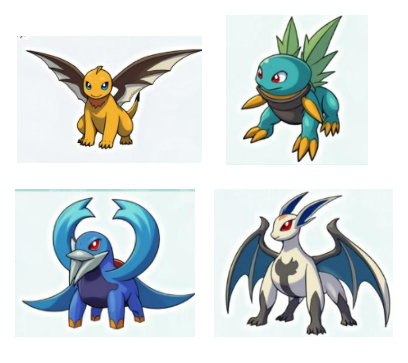......................................................................

Our goal is to determine the rarity of a Pokémon based on its features. Each of these categories adds depth to the game, offering players different challenges and opportunities for team-building and strategy


The dataset contains detailed information on 1007 Pokémon from the popular mobile game Pokémon GO. It includes a wide range of attributes such as base stats, move sets, rarity, and acquisition methods.

The data is downloded from kaggle please refer to this <a href='https://www.kaggle.com/datasets/shreyasur965/pokemon-go'>link</a> for more details about the data.



# STEP 1: Import the necessary Libraries

In [ ]:
# Core libraries
# For numerical operations & data manipulation and analysis
import pandas as pd
import numpy as np


# Data visualization libraries
# For creating attractive visualizations
import matplotlib.pyplot as plt
import seaborn as sns


# Machine learning libraries
  # For splitting data into training and testing sets
  # For evaluation metrics
  # For additional classification metrics
  # For feature scaling (standardization)
  # For ensemble classification algorithms
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import (accuracy_score, classification_report,
                             precision_score, recall_score, f1_score,
                             confusion_matrix)
from sklearn.ensemble import (RandomForestClassifier, GradientBoostingClassifier)


# Imbalanced data handling
  # For handling class imbalance using Synthetic Minority Over-sampling Technique
import imblearn
from imblearn.over_sampling import SMOTE


# Warning management
# To ignore warning messages during execution
try:
  import warnings
  warnings.filterwarnings('ignore')
except:
  pass



# STEP 2: Loading the Data

**Dataset Information:**

The data was collected using the RapidAPI Pokémon GO API, offering researchers and data enthusiasts a rich resource for analysis, machine learning projects, and game strategy development.

Key features of this dataset include:

- Comprehensive coverage of 1007 Pokémon
- 24 attributes for each Pokémon, including battle stats, type, and rarity
- Information on acquisition methods (wild, egg, raid, etc.)
- Move set details for both fast and charged moves
- Game mechanics data such as capture and flee rates

### 2.1 Load the dataset, set columns to display 30, and view it
* Identify the type of values (numerical, categorical, or any format) present in the columns.

In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [ ]:
# Load the dataset
 # Reading the 'pokemon.csv' file into a DataFrame
data = pd.read_csv('/content/drive/MyDrive/bagging_and_boosting/pokemon.csv')

# Set pandas display option to show 30 columns
pd.set_option('display.max_columns', 30)

# Display the first 5 rows of the dataset
 # Show the first few entries to get an overview of the data

# Check data
data.head()

,pokemon_id,pokemon_name,base_attack,base_defense,base_stamina,type,rarity,charged_moves,fast_moves,candy_required,distance,max_cp,attack_probability,base_capture_rate,base_flee_rate,dodge_probability,max_pokemon_action_frequency,min_pokemon_action_frequency,found_egg,found_evolution,found_wild,found_research,found_raid,found_photobomb
0,1,Bulbasaur,118,111,128,"['Grass', 'Poison']",Standard,"['Sludge Bomb', 'Seed Bomb', 'Power Whip']","['Vine Whip', 'Tackle']",NaN,3,1275,0.1,-1.0,-1.0,0.15,1.6,0.2,True,False,True,True,True,True
1,2,Ivysaur,151,143,155,"['Grass', 'Poison']",Standard,"['Sludge Bomb', 'Solar Beam', 'Power Whip']","['Razor Leaf', 'Vine Whip']",25.0,3,1943,0.1,-1.0,-1.0,0.15,1.6,0.2,False,True,True,True,True,True
2,3,Venusaur,198,189,190,"['Grass', 'Poison']",Standard,"['Sludge Bomb', 'Petal Blizzard', 'Solar Beam']","['Razor Leaf', 'Vine Whip']",100.0,3,3112,0.2,-1.0,-1.0,0.15,1.6,0.2,False,True,True,True,True,True
3,4,Charmander,116,93,118,['Fire'],Standard,"['Flame Charge', 'Flame Burst', 'Flamethrower']","['Ember', 'Scratch']",NaN,3,1121,0.1,-1.0,-1.0,0.15,1.6,0.2,True,False,True,True,True,True
4,5,Charmeleon,158,126,151,['Fire'],Standard,"['Fire Punch', 'Flame Burst', 'Flamethrower']","['Ember', 'Fire Fang']",25.0,3,1891,0.1,-1.0,-1.0,0.15,1.6,0.2,False,True,True,True,True,True


### 2.2 Check the unique values in the `rarity` column

In [ ]:
# Find unique values in the 'rarity' column
data.rarity.unique()


array(['Standard', 'Legendary', 'Mythic', 'Ultra beast'], dtype=object)

### 2.3 View the columns of the data and understand them

In [ ]:
# Display all column names in the DataFrame
data.columns


Index(['pokemon_id', 'pokemon_name', 'base_attack', 'base_defense',
       'base_stamina', 'type', 'rarity', 'charged_moves', 'fast_moves',
       'candy_required', 'distance', 'max_cp', 'attack_probability',
       'base_capture_rate', 'base_flee_rate', 'dodge_probability',
       'max_pokemon_action_frequency', 'min_pokemon_action_frequency',
       'found_egg', 'found_evolution', 'found_wild', 'found_research',
       'found_raid', 'found_photobomb'],
      dtype='object')

### 2.4 Check the shape of the dataset

In [ ]:
# Get the shape of the DataFrame
data.shape


(1007, 24)


### 2.5 Understand the datatypes of each of the columns

In [ ]:
# Get a concise summary of the DataFrame
data.describe()

,pokemon_id,base_attack,base_defense,base_stamina,candy_required,distance,max_cp,attack_probability,base_capture_rate,base_flee_rate,dodge_probability,max_pokemon_action_frequency,min_pokemon_action_frequency
count,1007.000000,1007.000000,1007.000000,1007.000000,471.000000,1007.000000,1007.000000,904.000000,904.0,904.0,904.000000,904.000000,904.000000
mean,504.105263,166.268123,143.824230,171.078451,65.995754,5.058590,2309.782522,0.140951,-1.0,-1.0,0.159093,1.600996,0.204701
std,291.003489,59.382689,52.023124,47.956251,61.598321,5.458459,1118.813651,0.090397,0.0,0.0,0.062609,0.029934,0.058141
min,1.000000,0.000000,0.000000,0.000000,12.000000,1.000000,16.000000,0.000000,-1.0,-1.0,0.000000,1.600000,0.200000
25%,252.500000,119.000000,103.000000,137.000000,25.000000,3.000000,1306.000000,0.100000,-1.0,-1.0,0.150000,1.600000,0.200000
50%,504.000000,165.000000,142.000000,167.000000,50.000000,3.000000,2304.000000,0.100000,-1.0,-1.0,0.150000,1.600000,0.200000
75%,755.500000,211.000000,179.000000,193.000000,100.000000,5.000000,3138.000000,0.200000,-1.0,-1.0,0.150000,1.600000,0.200000
max,1008.000000,414.000000,505.000000,496.000000,400.000000,20.000000,9366.000000,0.700000,-1.0,-1.0,1.000000,2.500000,1.100000


### 2.6 Generate Descriptive Statistics and closely examine the results to assess the skewness of the values in the columns

In [ ]:
# Generate descriptive statistics for numeric columns
data.select_dtypes(include='number').describe()

,pokemon_id,base_attack,base_defense,base_stamina,candy_required,distance,max_cp,attack_probability,base_capture_rate,base_flee_rate,dodge_probability,max_pokemon_action_frequency,min_pokemon_action_frequency
count,1007.000000,1007.000000,1007.000000,1007.000000,471.000000,1007.000000,1007.000000,904.000000,904.0,904.0,904.000000,904.000000,904.000000
mean,504.105263,166.268123,143.824230,171.078451,65.995754,5.058590,2309.782522,0.140951,-1.0,-1.0,0.159093,1.600996,0.204701
std,291.003489,59.382689,52.023124,47.956251,61.598321,5.458459,1118.813651,0.090397,0.0,0.0,0.062609,0.029934,0.058141
min,1.000000,0.000000,0.000000,0.000000,12.000000,1.000000,16.000000,0.000000,-1.0,-1.0,0.000000,1.600000,0.200000
25%,252.500000,119.000000,103.000000,137.000000,25.000000,3.000000,1306.000000,0.100000,-1.0,-1.0,0.150000,1.600000,0.200000
50%,504.000000,165.000000,142.000000,167.000000,50.000000,3.000000,2304.000000,0.100000,-1.0,-1.0,0.150000,1.600000,0.200000
75%,755.500000,211.000000,179.000000,193.000000,100.000000,5.000000,3138.000000,0.200000,-1.0,-1.0,0.150000,1.600000,0.200000
max,1008.000000,414.000000,505.000000,496.000000,400.000000,20.000000,9366.000000,0.700000,-1.0,-1.0,1.000000,2.500000,1.100000


### 2.7 Generate Descriptive Statistics for categorical columns and closely examine the results

In [ ]:
# Generate descriptive statistics for categorical columns
data.select_dtypes(include='object').describe()

,pokemon_name,type,rarity,charged_moves,fast_moves,found_egg,found_evolution,found_wild,found_research,found_raid,found_photobomb
count,1007,1007,1007,1007,1007,744,744,744,744,744,744
unique,1007,206,4,894,691,2,2,2,2,2,2
top,Miraidon,['Water'],Standard,['Struggle'],['Splash'],False,False,True,True,True,True
freq,1,73,910,36,17,685,379,737,741,455,738


### 2.8 Check the Null values
* Calculate the count of null values for each column in the DataFrame.
* Determine the percentage of null values in each column relative to the total number of rows.
* Create a new DataFrame that summarizes both the count and percentage of null values.
* Filter the summary DataFrame to only display columns that contain null values.
* Print the resulting summary DataFrame.

In [ ]:
data.columns

Index(['pokemon_id', 'pokemon_name', 'base_attack', 'base_defense',
       'base_stamina', 'type', 'rarity', 'charged_moves', 'fast_moves',
       'candy_required', 'distance', 'max_cp', 'attack_probability',
       'base_capture_rate', 'base_flee_rate', 'dodge_probability',
       'max_pokemon_action_frequency', 'min_pokemon_action_frequency',
       'found_egg', 'found_evolution', 'found_wild', 'found_research',
       'found_raid', 'found_photobomb'],
      dtype='object')

In [ ]:
# Calculate the count of null (NaN) values in each column of the DataFrame 'df'

columns = data.columns

#Create empty dictionaries to store null counts and percentages
null_count_dict = {}
null_percentage_dict = {}


for column in columns:

  count = data[column].isna().sum()

  # Calculate the percentage of null values for each column
  # This is done by dividing the null counts by the total number of rows in 'df' (len(df))
  # and multiplying by 100 to convert it to a percentage
  percentage = (count/len(data))*100

  # print(count, percentage)


  null_count_dict[column] = count
  null_percentage_dict[column] = percentage


print(null_count_dict)
print(null_percentage_dict)



# Creating a new DataFrame to hold null counts and percentages
null_summary_df = pd.DataFrame({
    'Null Count': null_count_dict,
    'Null Percentage': null_percentage_dict
})


# Filtering to only show columns with null values
null_summary_df = null_summary_df[null_summary_df['Null Count'] > 0]


# Displaying the null summary DataFrame
null_summary_df

{'pokemon_id': np.int64(0), 'pokemon_name': np.int64(0), 'base_attack': np.int64(0), 'base_defense': np.int64(0), 'base_stamina': np.int64(0), 'type': np.int64(0), 'rarity': np.int64(0), 'charged_moves': np.int64(0), 'fast_moves': np.int64(0), 'candy_required': np.int64(536), 'distance': np.int64(0), 'max_cp': np.int64(0), 'attack_probability': np.int64(103), 'base_capture_rate': np.int64(103), 'base_flee_rate': np.int64(103), 'dodge_probability': np.int64(103), 'max_pokemon_action_frequency': np.int64(103), 'min_pokemon_action_frequency': np.int64(103), 'found_egg': np.int64(263), 'found_evolution': np.int64(263), 'found_wild': np.int64(263), 'found_research': np.int64(263), 'found_raid': np.int64(263), 'found_photobomb': np.int64(263)}
{'pokemon_id': np.float64(0.0), 'pokemon_name': np.float64(0.0), 'base_attack': np.float64(0.0), 'base_defense': np.float64(0.0), 'base_stamina': np.float64(0.0), 'type': np.float64(0.0), 'rarity': np.float64(0.0), 'charged_moves': np.float64(0.0), 'fa

,Null Count,Null Percentage
candy_required,536,53.227408
attack_probability,103,10.228401
base_capture_rate,103,10.228401
base_flee_rate,103,10.228401
dodge_probability,103,10.228401
max_pokemon_action_frequency,103,10.228401
min_pokemon_action_frequency,103,10.228401
found_egg,263,26.117180
found_evolution,263,26.117180
found_wild,263,26.117180


### 2.9 Drop the `candy_required` column from original df

In [ ]:
# Drop the 'candy_required' from the original dataframe df
data.drop('candy_required', axis=1, inplace=True)


### 2.10 Drop the `candy_required` index from null_summary

In [ ]:
# Drop the 'candy_required' from the index of null summary
null_summary_df.drop('candy_required', axis=0, inplace=True)


### 2.11 Print the null_summary dataframe

In [ ]:
# Displaying the null summary DataFrame
print(null_summary_df)


                              Null Count  Null Percentage
attack_probability                   103        10.228401
base_capture_rate                    103        10.228401
base_flee_rate                       103        10.228401
dodge_probability                    103        10.228401
max_pokemon_action_frequency         103        10.228401
min_pokemon_action_frequency         103        10.228401
found_egg                            263        26.117180
found_evolution                      263        26.117180
found_wild                           263        26.117180
found_research                       263        26.117180
found_raid                           263        26.117180
found_photobomb                      263        26.117180


### 2.12 Fill na values


2.12.1 Slice the required column names from the null_summary

In [ ]:
# Define indices for numerical and boolean columns

# Get the list of numeric column names
numeric_column_names = data.select_dtypes(include='number').columns

# Get the list of all column names
all_column_names = data.columns

# Filter numerical column names for imputation (not containing 'found')
# Use boolean indexing directly on the column names Index
numerical_columns = all_column_names[(~all_column_names.str.contains('found')) & (all_column_names.isin(numeric_column_names))]

# Filter boolean column names for imputation (containing 'found' and being numeric)
boolean_columns = all_column_names[all_column_names.str.contains('found')]

# Check DF with new column lists
# data[numerical_columns]
# data[boolean_columns]

2.12.2 Run a loop to impute the mean values to the numerical columns in the original dataframe(df)

In [ ]:
data.isna().sum()

,0
pokemon_id,0
pokemon_name,0
base_attack,0
base_defense,0
base_stamina,0
type,0
rarity,0
charged_moves,0
fast_moves,0
distance,0


In [ ]:
numerical_columns

Index(['pokemon_id', 'base_attack', 'base_defense', 'base_stamina', 'distance',
       'max_cp', 'attack_probability', 'base_capture_rate', 'base_flee_rate',
       'dodge_probability', 'max_pokemon_action_frequency',
       'min_pokemon_action_frequency'],
      dtype='object')

In [ ]:
# Impute mean for numerical columns
for column in numerical_columns:

  data[column].fillna(data[column].mean(), inplace=True)

# Check the null values in the original df using isna()
data.isna().sum()

,0
pokemon_id,0
pokemon_name,0
base_attack,0
base_defense,0
base_stamina,0
type,0
rarity,0
charged_moves,0
fast_moves,0
distance,0


2.12.3 Run a loop to impute the mode values to the categorical columns in the original dataframe(df)

In [ ]:
# Impute default value for boolean columns
for column in boolean_columns:

  mode_value = data[column].mode()[0] # Calculate the mode
  data[column].fillna(mode_value, inplace=True) # Fill NaN with the mode

  # data[column].fillna(data[column].mode(), inplace=True)


2.12.4 Check the null values in df(original dataframe) after imputation

In [ ]:
# Check the null values in the original df using isna()
data.isna().sum()

,0
pokemon_id,0
pokemon_name,0
base_attack,0
base_defense,0
base_stamina,0
type,0
rarity,0
charged_moves,0
fast_moves,0
distance,0


### 2.13 Find unique value count for each feature

In [ ]:
# Get the count of unique values in each column of the DataFrame
data.nunique()

,0
pokemon_id,1007
pokemon_name,1007
base_attack,244
base_defense,210
base_stamina,117
type,206
rarity,4
charged_moves,894
fast_moves,691
distance,4


### 2.14 Drop features with only 1 unique value

In [ ]:
# Drop column with only 1 unique value as it adds no value during model training
data.drop(['base_capture_rate', 'base_flee_rate'], axis=1, inplace=True)

### 2.15 Drop features which all values unique

In [ ]:
# Drop column with all values unique because the only act as identifier of records
data.drop(['pokemon_id', 'pokemon_name'], axis=1, inplace=True)

### 2.16 Dropping `charged_moves` and `fast_moves` because of there high cardinality.

In [ ]:
#Drop column with high cardinal categorical columns as the data size is not
#that huge such columns will be difficult to learn
data.drop(['charged_moves', 'fast_moves'], axis=1, inplace=True)

## STEP 3: Exploratory Data Analysis(EDA)

In [ ]:
# Separate numeric and categorical columns
numeric_columns = data.select_dtypes(include='number').columns
categorical_columns = data.select_dtypes(include='object').columns

### 3.1 Check the distribution of the target variable - `rarity`.

In [ ]:
# Check the proportions if the data
data.rarity.value_counts(normalize=True)

,proportion
rarity,
Standard,0.903674
Legendary,0.063555
Mythic,0.021847
Ultra beast,0.010924


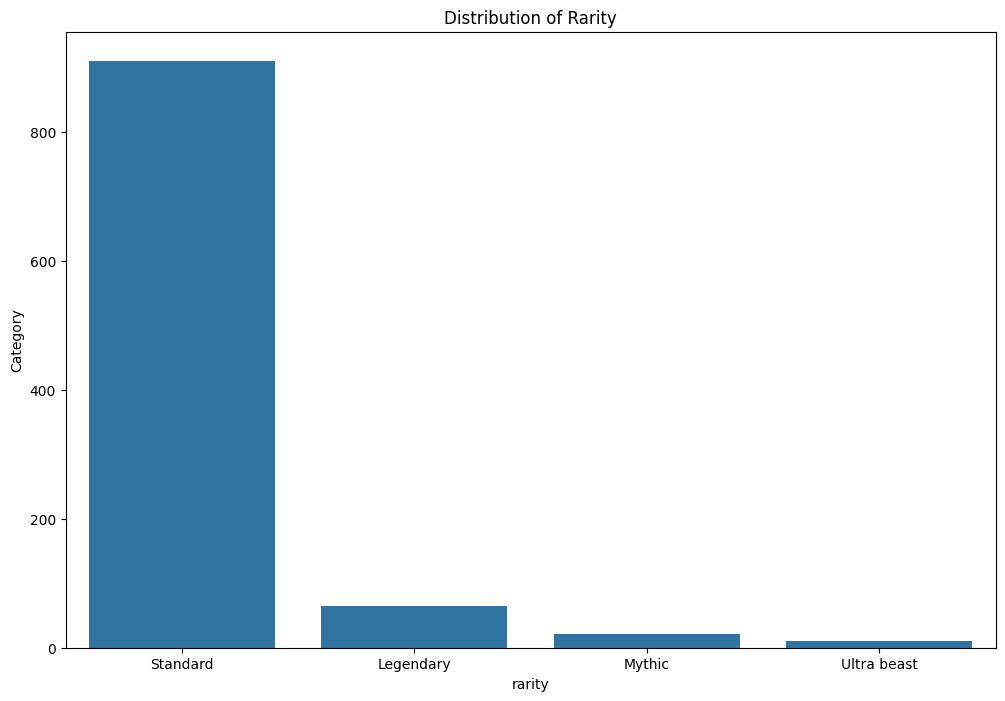

In [ ]:
# Check the distribution of the target variable 'y'

# Set the figure size for better readability
plt.figure(figsize=(12,8))

# Create a count plot for the 'y' variable in the dataset
sns.countplot(data=data, x='rarity')


# Add a title to the plot
plt.title('Distribution of Rarity')

# Label the x-axis
plt.ylabel('Count')

# Label the y-axis
plt.ylabel('Category')

# Display the plot
plt.show()



# STEP 4: Feature Engineering

### 4.1 Perform correlation analysis of the data

<Figure size 1200x800 with 0 Axes>

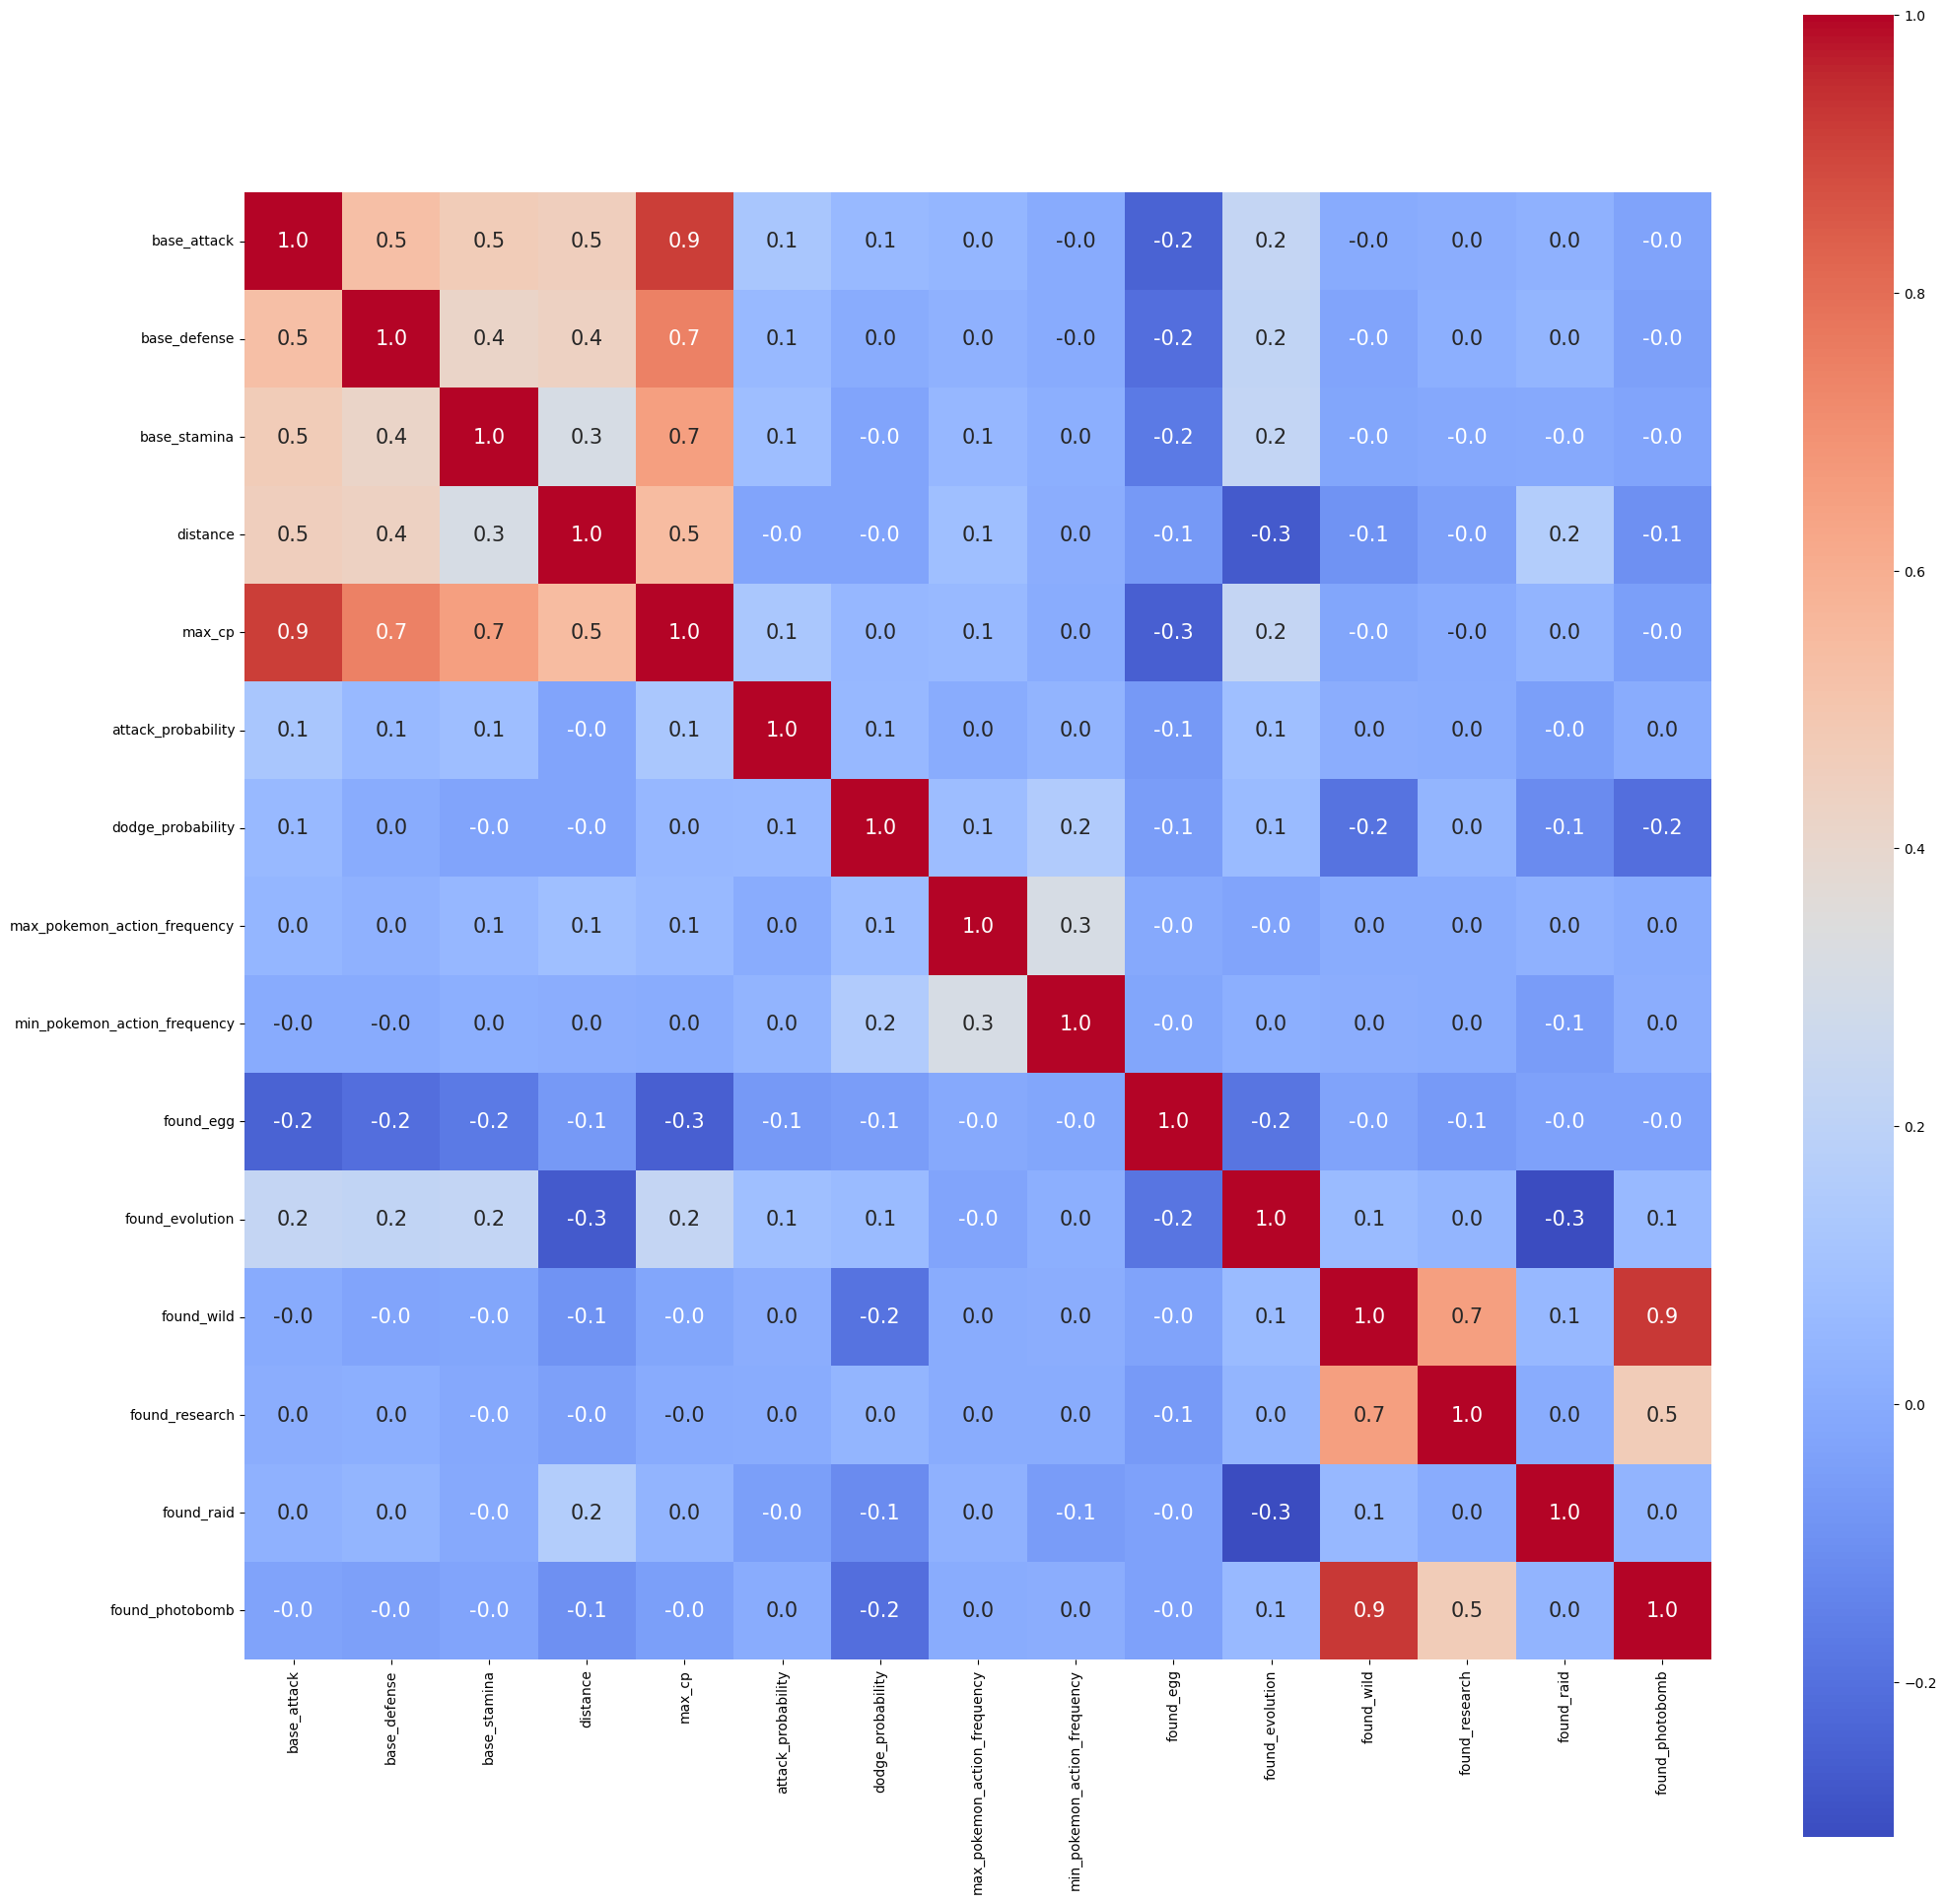

In [ ]:
#Correlation analysis of the dataset
# Set the figure size to make the heatmap more readable
plt.figure(figsize=(12,8))

# Create a heatmap to visualize the correlation matrix of the numeric features in the dataset
# The 'annot=True' parameter adds the correlation values directly on the heatmap
# 'cmap='coolwarm'' applies a color map to distinguish positive and negative correlations clearly


# Encoding boolean variable
for column in boolean_columns:
  data[column] = np.where(data[column] == True, 1, 0)


# Find the correlation
corr = data.loc[:, data.columns.isin(data.select_dtypes(include = 'number'))].corr()

# Plotting the heatmap of correlation between features
plt.figure(figsize=(24,24))
sns.heatmap(corr, cbar=True, square= True, fmt='.1f', annot=True, annot_kws={'size':15}, cmap='coolwarm')

# Display the heatmap
plt.show()









### 4.2: Combining and removing features with high correlation

- **Base Attack:** The base attack stat of the Pokémon, which determines its offensive capabilities in battles.
- **Base Defense:** The base defense stat of the Pokémon, which indicates how well it can withstand attacks from opponents.
- **Base Stamina:** The base stamina (HP) stat of the Pokémon, representing its overall health and endurance during battles.
- **Max CP:** The maximum Combat Power (CP) that the Pokémon can achieve, indicating its potential strength in battles.

Sum the base attack, base defense, and base stamina to create a total stats feature, giving a quick overview of a Pokémon's overall potential.

The ratio of Total Stats to Max CP can provide insights into the overall effectiveness and balance of a Pokémon in battles.

4.2.1 Pre-processing columns
* Sum the values of the `base_attack`, `base_defense`, and `base_stamina` columns to create a new feature called `total_stats`. This will give a quick overview of a Pokémon's overall potential.

* Using the `total_stats` feature, calculate the ratio of `total_stats` to `max_cp` for each Pokémon. What insights does this ratio provide about a Pokémon's effectiveness and balance in battles?

In [ ]:
# Calculate the total stats of the Pokémon by summing base attack, defense, and stamina
  # Total stats feature
total_stats = data['base_attack'] + data['base_defense'] + data['base_stamina']


# Calculate CP efficiency by dividing total stats by maximum Combat Power (CP)
  # CP efficiency feature
cp_efficiency_rate = total_stats / data['max_cp']


#Add new columns to the DF
data['total_stats'] = total_stats
data['cp_efficiency_rate'] = cp_efficiency_rate


#Check DF
data.head()

,base_attack,base_defense,base_stamina,type,rarity,distance,max_cp,attack_probability,dodge_probability,max_pokemon_action_frequency,min_pokemon_action_frequency,found_egg,found_evolution,found_wild,found_research,found_raid,found_photobomb,total_stats,cp_efficiency_rate
0,118,111,128,"['Grass', 'Poison']",Standard,3,1275,0.1,0.15,1.6,0.2,1,0,1,1,1,1,357,0.280000
1,151,143,155,"['Grass', 'Poison']",Standard,3,1943,0.1,0.15,1.6,0.2,0,1,1,1,1,1,449,0.231086
2,198,189,190,"['Grass', 'Poison']",Standard,3,3112,0.2,0.15,1.6,0.2,0,1,1,1,1,1,577,0.185411
3,116,93,118,['Fire'],Standard,3,1121,0.1,0.15,1.6,0.2,1,0,1,1,1,1,327,0.291704
4,158,126,151,['Fire'],Standard,3,1891,0.1,0.15,1.6,0.2,0,1,1,1,1,1,435,0.230037


4.2.2 Drop Redundant Columns

* Drop the columns `base_attack`, `base_defense`, `base_stamina`, `max_cp`, and `total_stats`.

* Since we have already created a comprehensive feature (`total_stats`) that sums up the attack, defense, and stamina, and calculated the ratio to max_cp, these individual columns are now redundant. Dropping them simplifies the dataset and prevents redundancy in model training, ensuring the model focuses on more meaningful and non-correlated features.

In [ ]:
# Drop base_attack, base_defense, base_stamina, max_cp, and total_stats.
data.drop(['base_attack', 'base_defense', 'base_stamina', 'max_cp'], axis=1, inplace=True)

4.2.3 Drop `found_wild`, `found_research` columns
* For the features `found_photobomb`, `found_wild`, and `found_research`, we will retain only one of them and remove the others due to their high correlation, with correlation values approaching 1. This will help reduce redundancy in our dataset and improve the model's efficiency.

In [ ]:
# Drop found_wild, found_research columns
data.drop(['found_wild', 'found_research'], axis=1, inplace=True)

### 4.3 Perform One-hot encoding on `type` feature

In Pokémon GO, Pokémon types play a crucial role in battles, influencing effectiveness against other types and overall strategy. Here are the main types of Pokémon in the game:

- **Normal:** Generally versatile but has no specific strengths or weaknesses.
- **Fire:** Strong against Grass, Bug, Ice, and Steel; weak to Water, Rock, and Ground.
- **Water:** Strong against Fire, Ground, and Rock; weak to Electric and Grass.
- **Grass:** Strong against Water, Ground, and Rock; weak to Fire, Ice, Poison, Flying, and Bug.
- **Electric:** Strong against Water and Flying; weak to Ground.
- **Ice:** Strong against Grass, Ground, Flying, and Dragon; weak to Fire, Fighting, Rock, and Steel.
- **Fighting:** Strong against Normal, Ice, Rock, Dark, and Steel; weak to Flying, Psychic, and Fairy.
- **Poison:** Strong against Grass and Fairy; weak to Ground and Psychic.
- **Ground:** Strong against Fire, Electric, Poison, Rock, and Steel; weak to Water, Grass, and Ice.
- **Flying:** Strong against Grass, Fighting, and Bug; weak to Electric, Rock, and Ice.
- **Psychic:** Strong against Fighting and Poison; weak to Bug, Ghost, and Dark.
- **Bug:** Strong against Grass, Psychic, and Dark; weak to Fire, Flying, Rock, and Fairy.
- **Rock:** Strong against Fire, Ice, Flying, and Bug; weak to Water, Grass, Fighting, Ground, Steel, and Fairy.
- **Ghost:** Strong against Psychic and Ghost; weak to Dark.
- **Dragon:** Strong against Dragon; weak to Ice, Fairy, and Dragon.
- **Dark:** Strong against Psychic and Ghost; weak to Fighting, Bug, and Fairy.
- **Steel:** Strong against Ice, Rock, and Fairy; weak to Fire, Fighting, and Ground.
- **Fairy:** Strong against Fighting, Dragon, and Dark; weak to Poison and Steel.

Each type interacts with others in a rock-paper-scissors manner, making type matchups crucial for battle strategy in Pokémon GO. This feature is also important for predicting rarity, as certain combinations of types can be common, while others may be rare and powerful.

4.3.1 Check `type` column

In [ ]:
# Display the first few entries of the 'type' column


Note: Run the below cell to create a function which splits the list values.

In [ ]:
# Function to split the items in the list
def process_type_column(value):
    """
    Process a string representing Pokémon types into a list.

    This function removes unwanted characters (single quotes, brackets)
    from the input string and splits it by commas to create a list
    of individual types.

    Parameters:
    value (str): A string containing Pokémon types.

    Returns:
    list: A list of Pokémon types as strings.
    """
    # Remove single quotes from the string
    value = value.replace("'", "")

    # Remove opening and closing brackets
    value = value.replace("[", "")
    value = value.replace("]", "")

    # Split the cleaned string by commas into a list
    value = value.split(',')

    return value  # Return the list of types

Note: Run the below cell to create a unique types dictonary.

In [ ]:
# Define a set of unique Pokémon types
unique_types = [
    'Bug', 'Dark', 'Dragon', 'Electric', 'Fairy', 'Fighting', 'Fire',
    'Flying', 'Ghost', 'Grass', 'Ground', 'Ice', 'Normal', 'Poison',
    'Psychic', 'Rock', 'Steel', 'Water'
]

# Create a dictionary with each unique type as a key,
# and initialize its value as a list of zeros with the length of the DataFrame
unique_types_dict = {ky: [0] * data.shape[0] for ky in unique_types}  # This prepares a structure to track the presence of each type for every Pokémon in the DataFrame

4.3.2 Encode `Type` into Binary Features

* Iterate over the `type` column in the DataFrame, process the list format values using the `process_type_column` function, and then update the `unique_types_dict` with binary indicators for each unique  `type`.

Instructions:
* Use the provided `process_type_column` function to split the list of types in the type column into individual type values.
* For each type, set the corresponding entry in `unique_types_dict` to 1, indicating the presence of that type for the current .
* This step will help convert the list of types into a binary feature matrix, allowing the types to be used in the model for training.

In [ ]:
# Iterate over the index and value of each entry in the 'type' column of the DataFrame
for index, kind in enumerate(data['type']):

    # Process the string to get a list of individual types
    types = process_type_column(kind)

    # Iterate over each type in the list
    for type in types:

        # Remove any leading or trailing whitespace from the type
        pokemon_type = type.strip()

        # print(type)

        # Set the corresponding entry in the unique_types_dict to 1,
        # indicating the presence of this type for the current Pokémon
        # Check if the extracted type is in our list of unique types
        if pokemon_type in unique_types_dict:
            # Set the corresponding entry in the unique_types_dict to 1
            # The index here is the row index from the DataFrame iteration
            unique_types_dict[pokemon_type][index] = 1

# Check one of the unique_types_dict
unique_types_dict['Water']

[0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,


4.3.3 Create a Dataframe(df_type)

In [ ]:
# Create a DataFrame from the unique_types_dict
pokeymon_type_df = pd.DataFrame(unique_types_dict)

4.3.4 Check the values of df_type

In [ ]:
# Display the first 5 rows of df_type
pokeymon_type_df.head()

,Bug,Dark,Dragon,Electric,Fairy,Fighting,Fire,Flying,Ghost,Grass,Ground,Ice,Normal,Poison,Psychic,Rock,Steel,Water
0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0
1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0
2,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0
3,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0


4.3.5 Concatenate the df_type with original dataframe(df)

In [ ]:
# Concatenate the original DataFrame (df) with the new type DataFrame (df_type) along the columns
data = pd.concat([data, pokeymon_type_df], axis=1)


Since we have separately encoded the values from the `type` column into binary features, it is now necessary to drop the original `type` column from the DataFrame.


4.3.6 Drop the `type` column

In [ ]:
# Drop the 'type' column from the DataFrame as it is now represented by the new binary columns
data.drop('type', axis=1, inplace=True)

4.3.7 Check the original dataset

In [ ]:
# Get the first 5 rows of df
data.head()

,rarity,distance,attack_probability,dodge_probability,max_pokemon_action_frequency,min_pokemon_action_frequency,found_egg,found_evolution,found_raid,found_photobomb,total_stats,cp_efficiency_rate,Bug,Dark,Dragon,Electric,Fairy,Fighting,Fire,Flying,Ghost,Grass,Ground,Ice,Normal,Poison,Psychic,Rock,Steel,Water
0,Standard,3,0.1,0.15,1.6,0.2,1,0,1,1,357,0.280000,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0
1,Standard,3,0.1,0.15,1.6,0.2,0,1,1,1,449,0.231086,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0
2,Standard,3,0.2,0.15,1.6,0.2,0,1,1,1,577,0.185411,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0
3,Standard,3,0.1,0.15,1.6,0.2,1,0,1,1,327,0.291704,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
4,Standard,3,0.1,0.15,1.6,0.2,0,1,1,1,435,0.230037,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0


### 4.4 Encode target column(`rarity`) to numeric

In [ ]:
# Import the LabelEncoder class for encoding categorical labels
import sklearn.preprocessing as preprocessing


# Initialize the LabelEncoder
label_encoder = preprocessing.LabelEncoder()


# Transform the 'rarity' column into numerical format using label encoding
# Each unique rarity class is assigned a numerical value, making it suitable for model training
data['rarity'] = label_encoder.fit_transform(data['rarity'])

### 4.5 Balance Data using SMOTE

In [ ]:
# Separate the features (X) from the target variable (y)
# Drop the target variable 'y' from the dataset to create the feature set X
X = data.drop('rarity', axis=1)


# Assign the target variable 'y' to the variable y
y = data['rarity']


# Apply SMOTE to balance the classes
balanced_X, balanced_y = SMOTE().fit_resample(X, y)


### 4.6 Check the Distribution of the Target Variable
* Use the .value_counts() method for the target variable '`rarity`'

In [ ]:
# Check the value_counts in y
balanced_y.value_counts()

,count
rarity,
2,910
0,910
1,910
3,910


# STEP 5: Model Building

### 5.1 Split the data into train and test

In [ ]:
# Splitting the dataset into training and testing sets
# 'test_size=0.25' means 25% of the data will be used for testing, and 75% for training
# 'random_state=100' ensures that the split is reproducible (same data split every time you run the code)
X_train, X_test, y_train, y_test = train_test_split(balanced_X, balanced_y, test_size=0.25, random_state=100)


# Check the data
X_train.head()

,distance,attack_probability,dodge_probability,max_pokemon_action_frequency,min_pokemon_action_frequency,found_egg,found_evolution,found_raid,found_photobomb,total_stats,cp_efficiency_rate,Bug,Dark,Dragon,Electric,Fairy,Fighting,Fire,Flying,Ghost,Grass,Ground,Ice,Normal,Poison,Psychic,Rock,Steel,Water
3525,20,0.1,0.15,1.6,0.2,0,0,1,1,634,0.171069,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3569,20,0.1,0.15,1.6,0.2,0,0,1,1,661,0.171640,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
3483,20,0.1,0.15,1.6,0.2,0,0,1,1,589,0.176654,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3336,20,0.1,0.15,1.6,0.2,0,0,1,1,631,0.164119,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2187,20,0.1,0.15,1.6,0.2,0,0,1,1,640,0.168263,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


### 5.2 Build a Random Forest Classifier on the data

In [ ]:
# Create a Random Forest Classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
rf_classifier.fit(X_train, y_train)

# Make predictions
y_pred = rf_classifier.predict(X_test)

# Evaluate the model
# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)

# Print the Accuary an classification report
print(f"Accuracy: {accuracy}")
print(classification_report(y_test, y_pred))

Accuracy: 0.9560439560439561
              precision    recall  f1-score   support

           0       0.97      0.93      0.95       229
           1       0.93      0.97      0.94       231
           2       1.00      0.99      0.99       236
           3       0.94      0.94      0.94       214

    accuracy                           0.96       910
   macro avg       0.96      0.96      0.96       910
weighted avg       0.96      0.96      0.96       910



### 5.3 Build a Random Forest Classifier on the data

In [ ]:
# Create a Gradient Boosting Classifier
gb_classifier = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3)

# Train the model
gb_classifier.fit(X_train, y_train)

# Make predictions
y_pred = gb_classifier.predict(X_test)

# Evaluate the model
# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)

# Print the Accuary an classification report
print(f"Accuracy: {accuracy}")
print(classification_report(y_test, y_pred))


Accuracy: 0.9274725274725275
              precision    recall  f1-score   support

           0       0.97      0.87      0.92       229
           1       0.89      0.91      0.90       231
           2       1.00      0.99      0.99       236
           3       0.86      0.93      0.89       214

    accuracy                           0.93       910
   macro avg       0.93      0.93      0.93       910
weighted avg       0.93      0.93      0.93       910



### STEP 6 : Conclusion

Between the Bagging algorithm(`Random Forest Classifier`) and the Boosting alogorithm(`Gradient Boosting Classifier`), which model performs better and why?

Consider the accuracy, precision, recall, and F1-score when making your decision.

In [ ]:
"""

The Random Forest Classifier performs as good or better than the Gradient Boosting Classifier in terms of accuracy, precision, recall, and F1-score.
The oonly caviout is a 1 point decrease in the precicsion of target 0 on the Random Forest Classifier vs the Gradient Boosting Classifier.

So, overwhelmingly, the Random Forest Classifier is the best model to use for predicting the Rarity of Pokémon.

"""